OAM DATA ANALYTICS BY IK

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import necessary libaries

In [2]:
def load_data(file_path, file_name, encoding='unicode-escape', header=0, skiprows=1):
    """Load data from a csv file and return a pandas DataFrame.
    File path and file name are required. Encoding, header and skiprows are necessary to get data.
    """
    file = os.path.join(file_path, file_name)
    return pd.read_csv(file, encoding=encoding, header=header, skiprows=skiprows, usecols=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

file_path = '/Users/igorkiss/Documents/Igor Personal/Data/'
file_name = '2015700023_20210707133325.csv'
#file_name2 = '2015700023_20240223212330.csv'
data = load_data(file_path, file_name)
#data2 = load_data(file_path, file_name2)
#data = pd.concat([data, data2], axis=0)
data['DateTime'] = pd.to_datetime(data['DateTime'])
data = data.set_index('DateTime')
data.columns = data.columns.str.replace(' ', '_')
data.head() 

,O2_Mode,SpO2_Target,O2,SpO2,PR,PI,SpO2_Target_Range_High,SpO2_Target_Range_Low,Flow_(L/min),Temp_(°C),O2_Limit,Signal_I/Q
DateTime,,,,,,,,,,,,
2021-07-07 13:33:26,Manual,93,29,0.0,0,0.0,95,90,6.0,37,30,0
2021-07-07 13:33:27,Manual,93,29,0.0,0,0.0,95,90,6.0,37,30,0
2021-07-07 13:33:28,Manual,93,29,0.0,0,0.0,95,90,6.0,37,30,0
2021-07-07 13:33:29,Manual,93,29,0.0,0,0.0,95,90,6.0,37,30,0
2021-07-07 13:33:30,Manual,93,29,0.0,0,0.0,95,90,6.0,37,30,0


Print total therapy time 

In [3]:
num_cols = list(data.select_dtypes(include=[np.number]).columns)
num_cols

['SpO2_Target',
 'O2',
 'SpO2',
 'PR',
 'PI',
 'SpO2_Target_Range_High',
 'SpO2_Target_Range_Low',
 'Flow_(L/min)',
 'Temp_(°C)',
 'O2_Limit',
 'Signal_I/Q']

In [4]:
total_time = data.index[-1] - data.index[0]
totaôl_time = total_time.total_seconds()
start_date = data.index[0]
end_date = data.index[-1]
print(f'Total time: ', total_time, 
      f'start date: ', start_date, f'end date: ', end_date, sep='\n')

Total time: 
18 days 18:15:52
start date: 
2021-07-07 13:33:26
end date: 
2021-07-26 07:49:18


Second column is O2 Mode lets print all used O2 modes unique values 

In [5]:
data['O2_Mode'].describe().to_frame().T

,count,unique,top,freq
O2_Mode,1620953,4,Auto,1520690


In [6]:
o2_modes = list(data['O2_Mode'].unique())
print('O2 Modes: ', o2_modes)

O2 Modes:  ['Manual', 'Auto', 'Override', 'Paused']


Now we can calculate how much the terapy was used in each ventilation modes

In [7]:
o2_mode_counts = data['O2_Mode'].value_counts(normalize=True) * 100
print(o2_mode_counts)

O2_Mode
Auto        93.814565
Paused       6.178588
Override     0.004010
Manual       0.002838
Name: proportion, dtype: float64


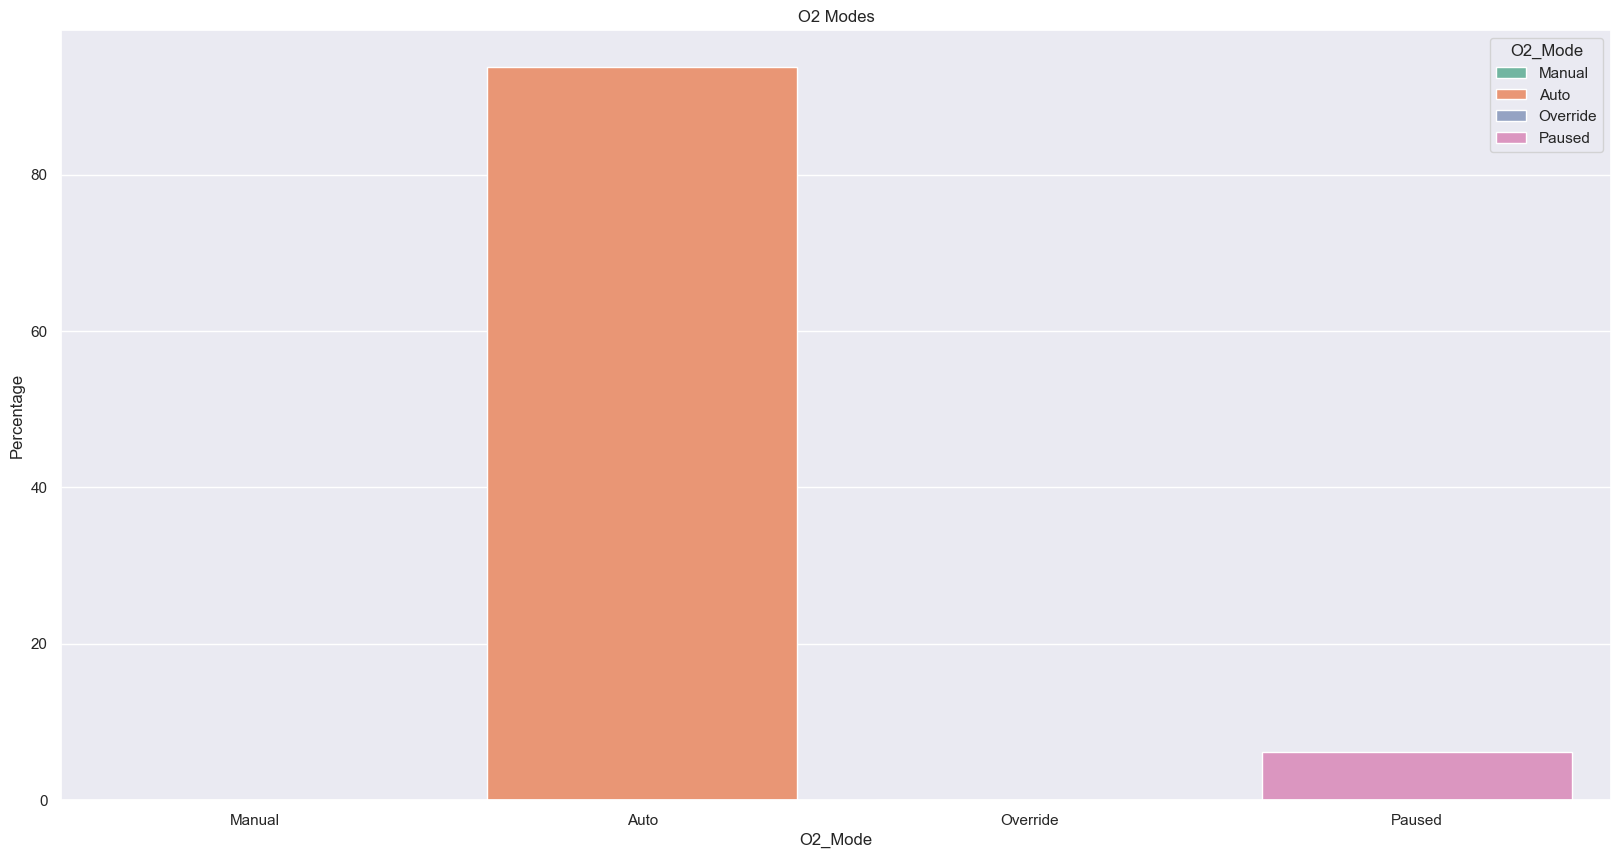

In [8]:
plt.figure(figsize=(20, 10))
sns.set_theme(style='darkgrid')
sns.countplot(x=data['O2_Mode'], stat='percent', palette='Set2', hue=data['O2_Mode'], legend=True)
plt.title('O2 Modes')
plt.ylabel('Percentage')
plt.show()

In [9]:
df_manual = data[data['O2_Mode'] == 'Manual']
df_auto = data[data['O2_Mode'] == 'Auto']
df_paused = data[data['O2_Mode'] == 'Paused']    

In [10]:
print(f'Median value O2 Rate in Manual Mode: {df_manual["O2"].median().round(2)}%',
      f'Median value O2 Rate in Auto Mode: {df_auto["O2"].median().round(2)}%',
      f'Median value O2 Rate in Paused Mode: {df_paused["O2"].median().round(2)}%', sep='\n')

Median value O2 Rate in Manual Mode: 29.0%
Median value O2 Rate in Auto Mode: 23.0%
Median value O2 Rate in Paused Mode: 26.0%


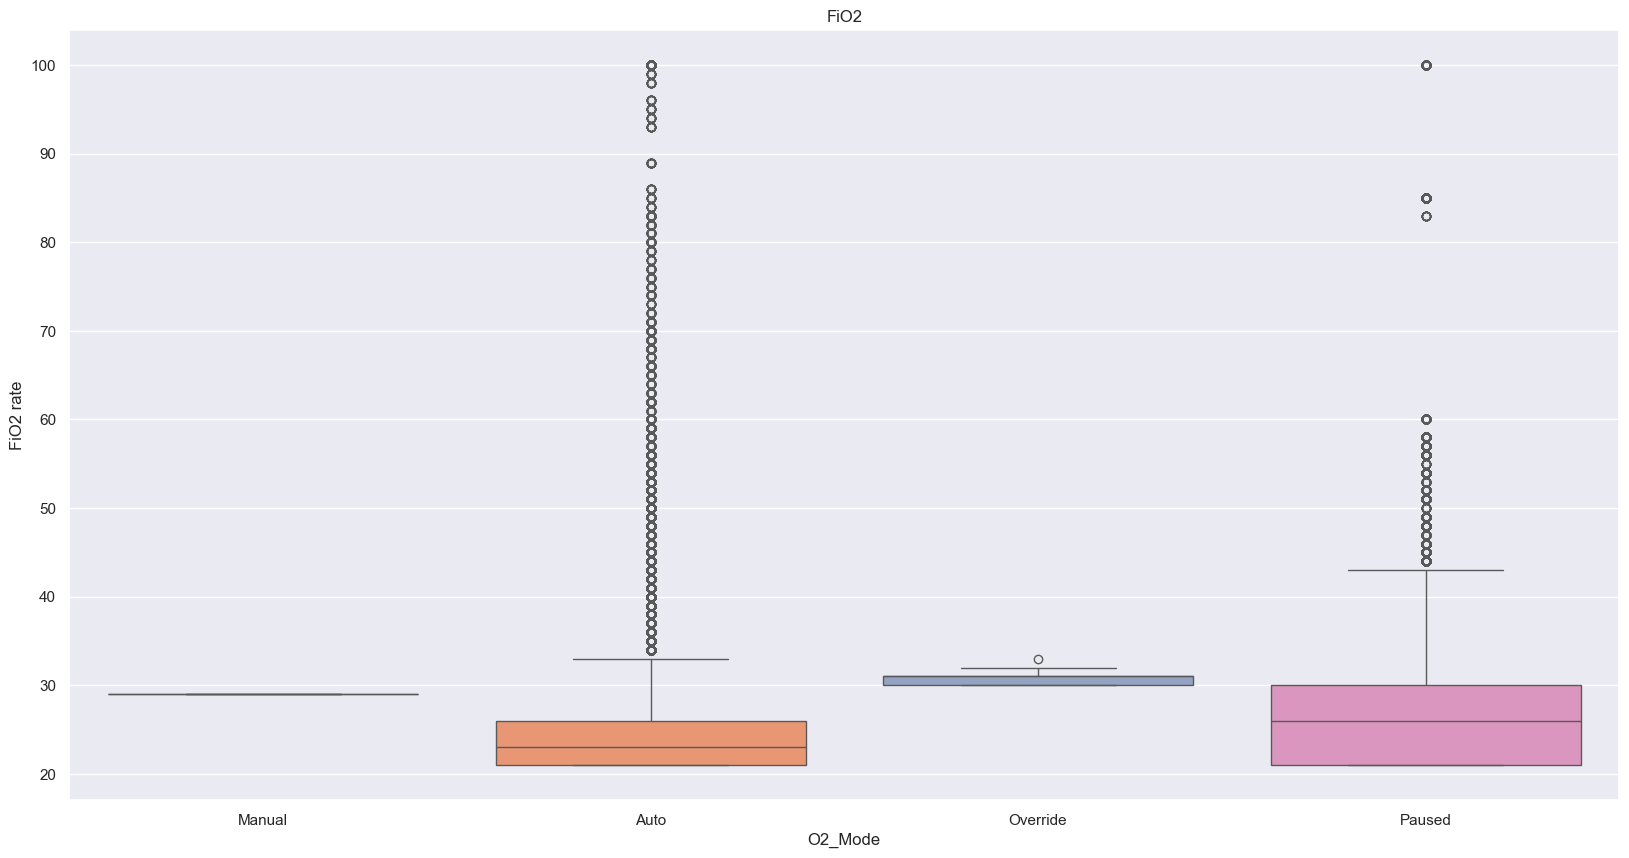

In [11]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='O2_Mode', y='O2', data=data, palette='Set2', hue='O2_Mode')  
plt.title('FiO2')
plt.ylabel('FiO2 rate')
plt.show()

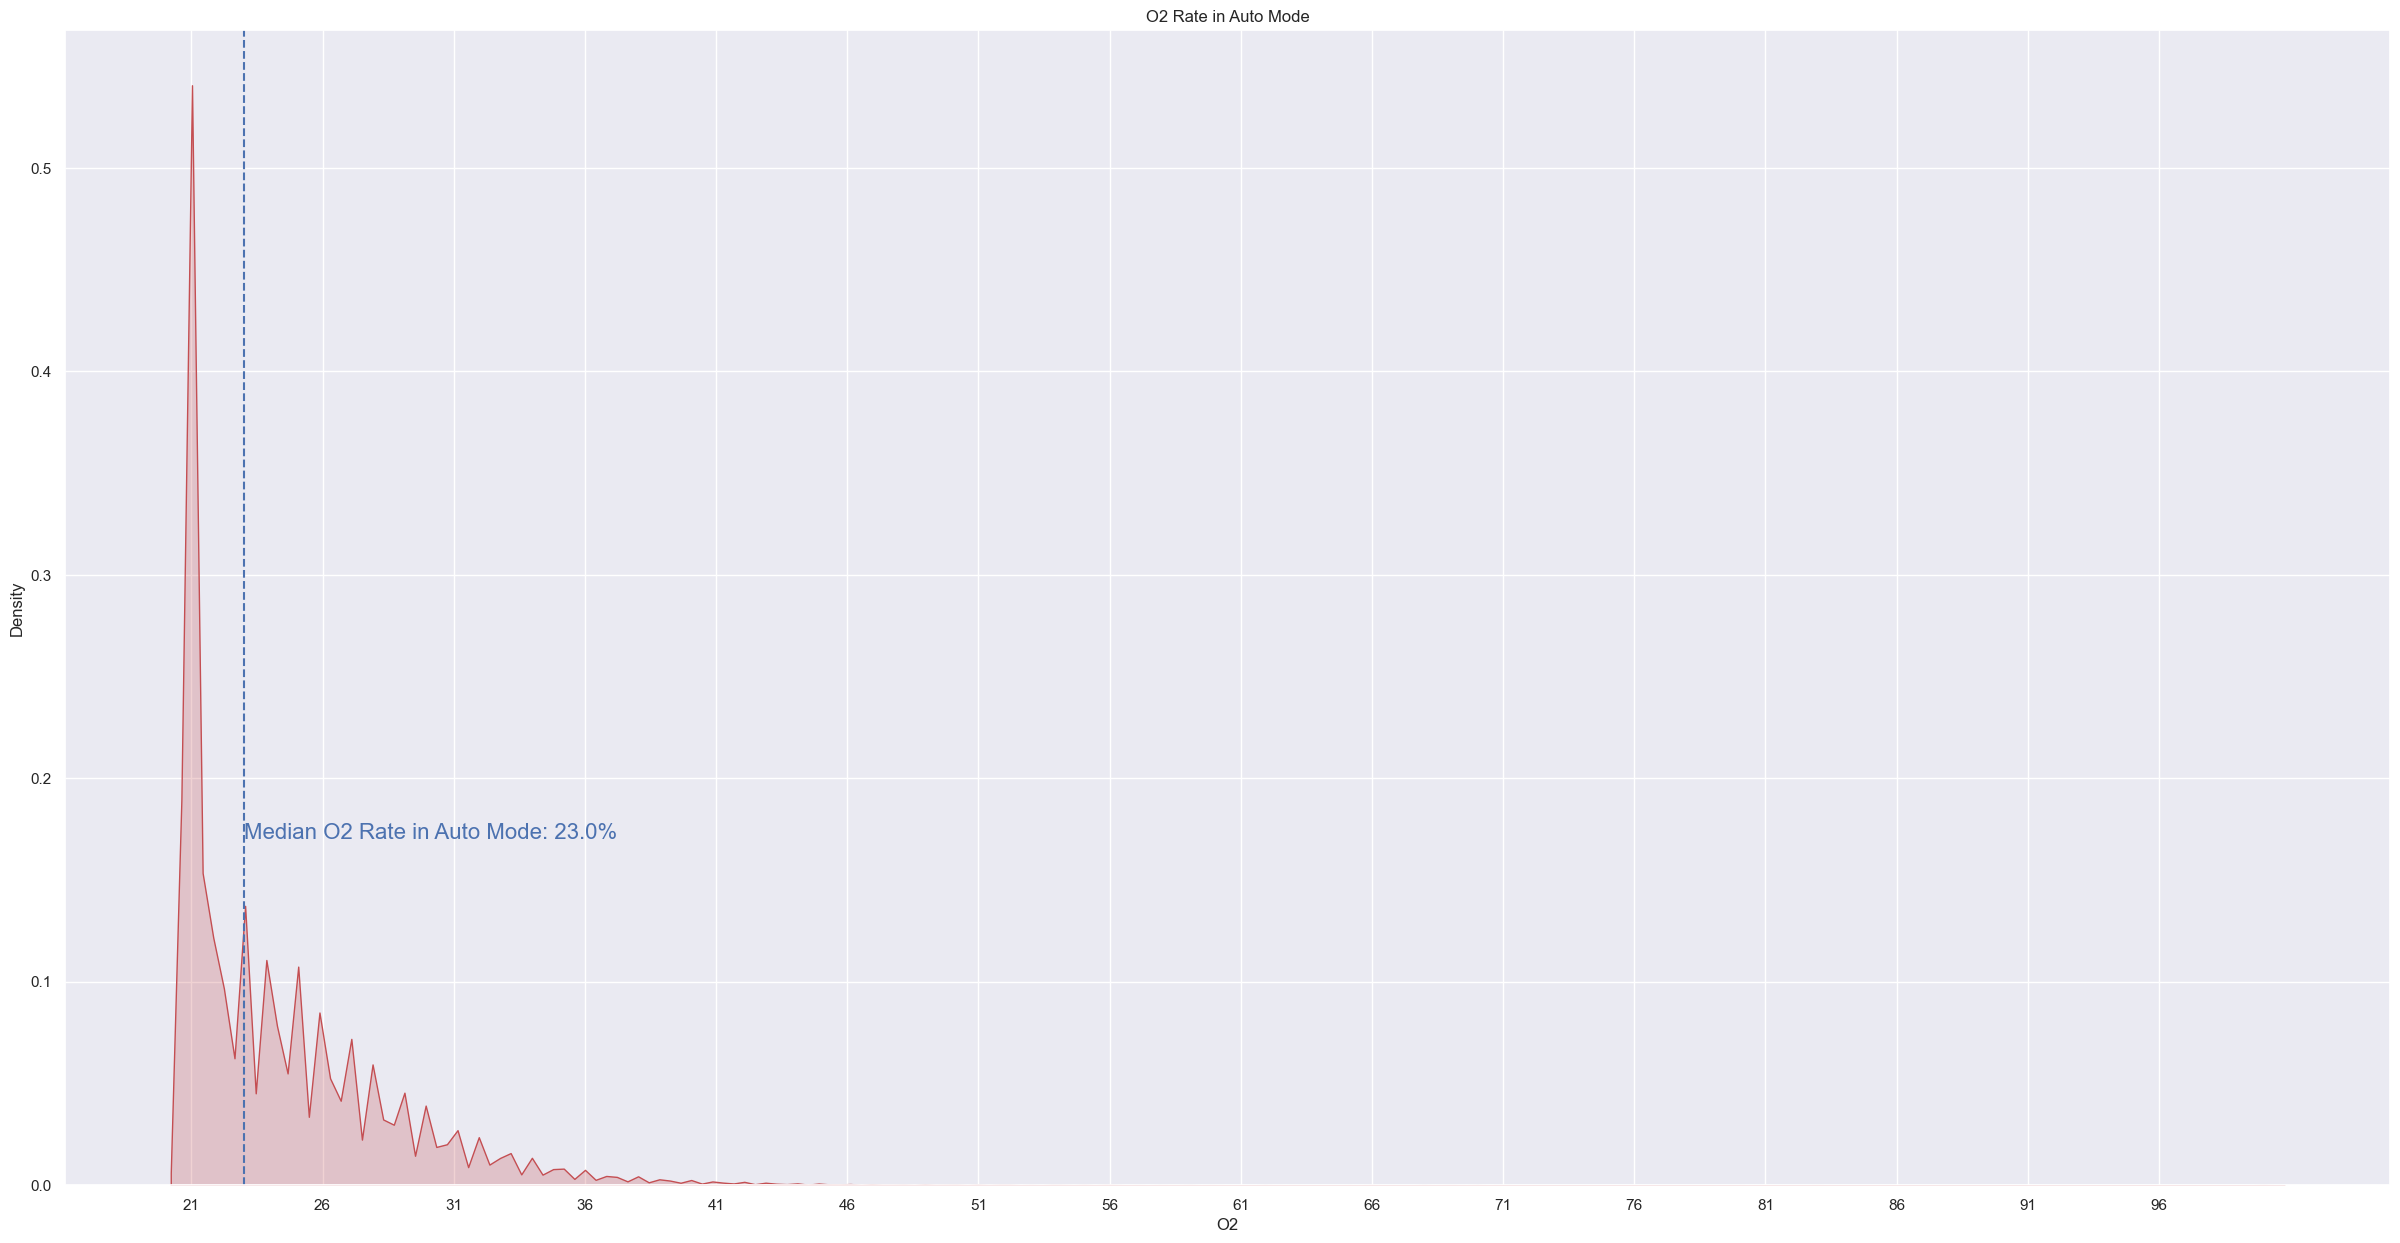

In [12]:
median_o2 = df_auto['O2'].median()
plt.figure(figsize=(30, 15))
sns.kdeplot(df_auto['O2'], color='r', label='Auto Mode', fill=True)
plt.axvline(median_o2, color='b', linestyle='--', label='Median O2 Rate in Auto Mode')
plt.text(median_o2, plt.gca().get_ylim()[1]*0.3, f'Median O2 Rate in Auto Mode: {median_o2.round(2)}%',
         fontsize=16, color='b' ,ha='left')
plt.title('O2 Rate in Auto Mode')
plt.xticks(np.arange(21, 100, 5))
plt.show()

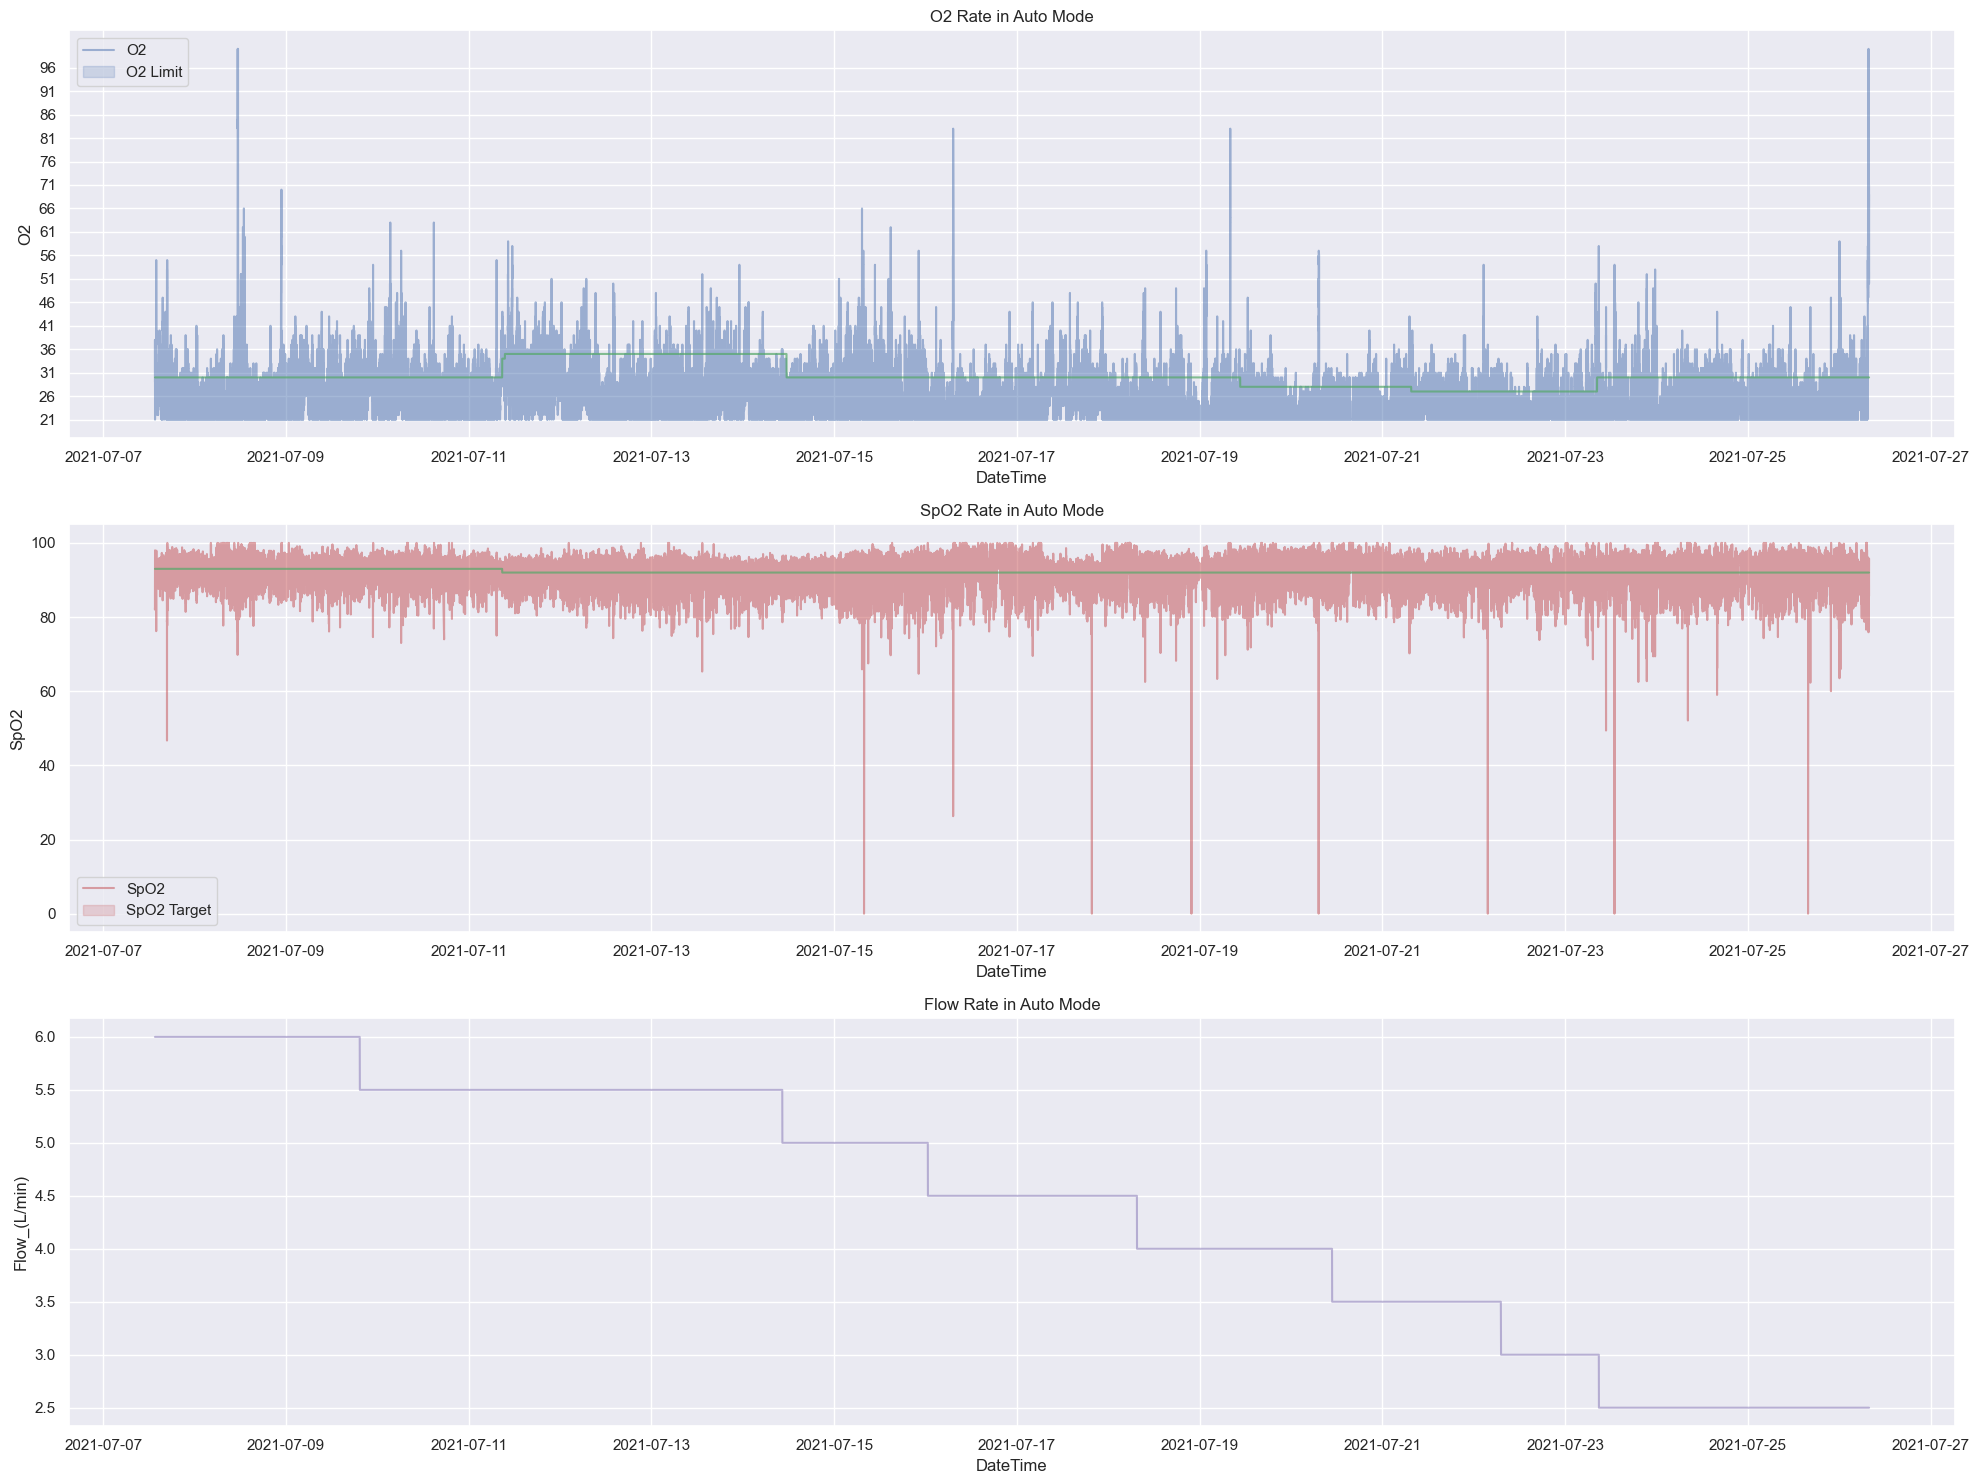

In [13]:
fig, ax = plt.subplots(3, 1, figsize=(20, 15))

sns.lineplot(x=df_auto.index, y=df_auto['O2'],color='b', alpha=0.5, ax=ax[0])
sns.lineplot(x=df_auto.index, y=df_auto['O2_Limit'],color='g', alpha=0.7, ax=ax[0])
ax[0].set_yticks(np.arange(21, 101, 5))
ax[0].set_title('O2 Rate in Auto Mode')
ax[0].legend(['O2', 'O2 Limit'])

sns.lineplot(x=df_auto.index, y=df_auto['SpO2'],color='r' ,alpha=0.5, ax=ax[1])
sns.lineplot(x=df_auto.index, y=df_auto['SpO2_Target'],color='g' ,alpha=0.7, ax=ax[1])
ax[1].legend(['SpO2', 'SpO2 Target'])
ax[1].set_title('SpO2 Rate in Auto Mode')

sns.lineplot(x=df_auto.index, y=df_auto['Flow_(L/min)'],color='m' , alpha=0.5, ax=ax[2])
ax[2].set_title('Flow Rate in Auto Mode')

plt.tight_layout()
plt.show()



In [14]:
less_40 = (df_auto['O2'] <= 40).mean() * 100
more_40 = (df_auto['O2'] > 40).mean() * 100

print(f'Less than 40% FiO2: {less_40:.2f}%',
      f'More than 40% FiO2: {more_40:.2f}%', sep='\n')

Less than 40% FiO2: 99.17%
More than 40% FiO2: 0.83%


In [15]:
df_resampled = df_auto[['O2', 'SpO2', 'Flow_(L/min)', 'SpO2_Target', 'Signal_I/Q']].resample('30MIN').mean()  
mask = df_resampled['SpO2'] >= df_resampled['SpO2_Target']

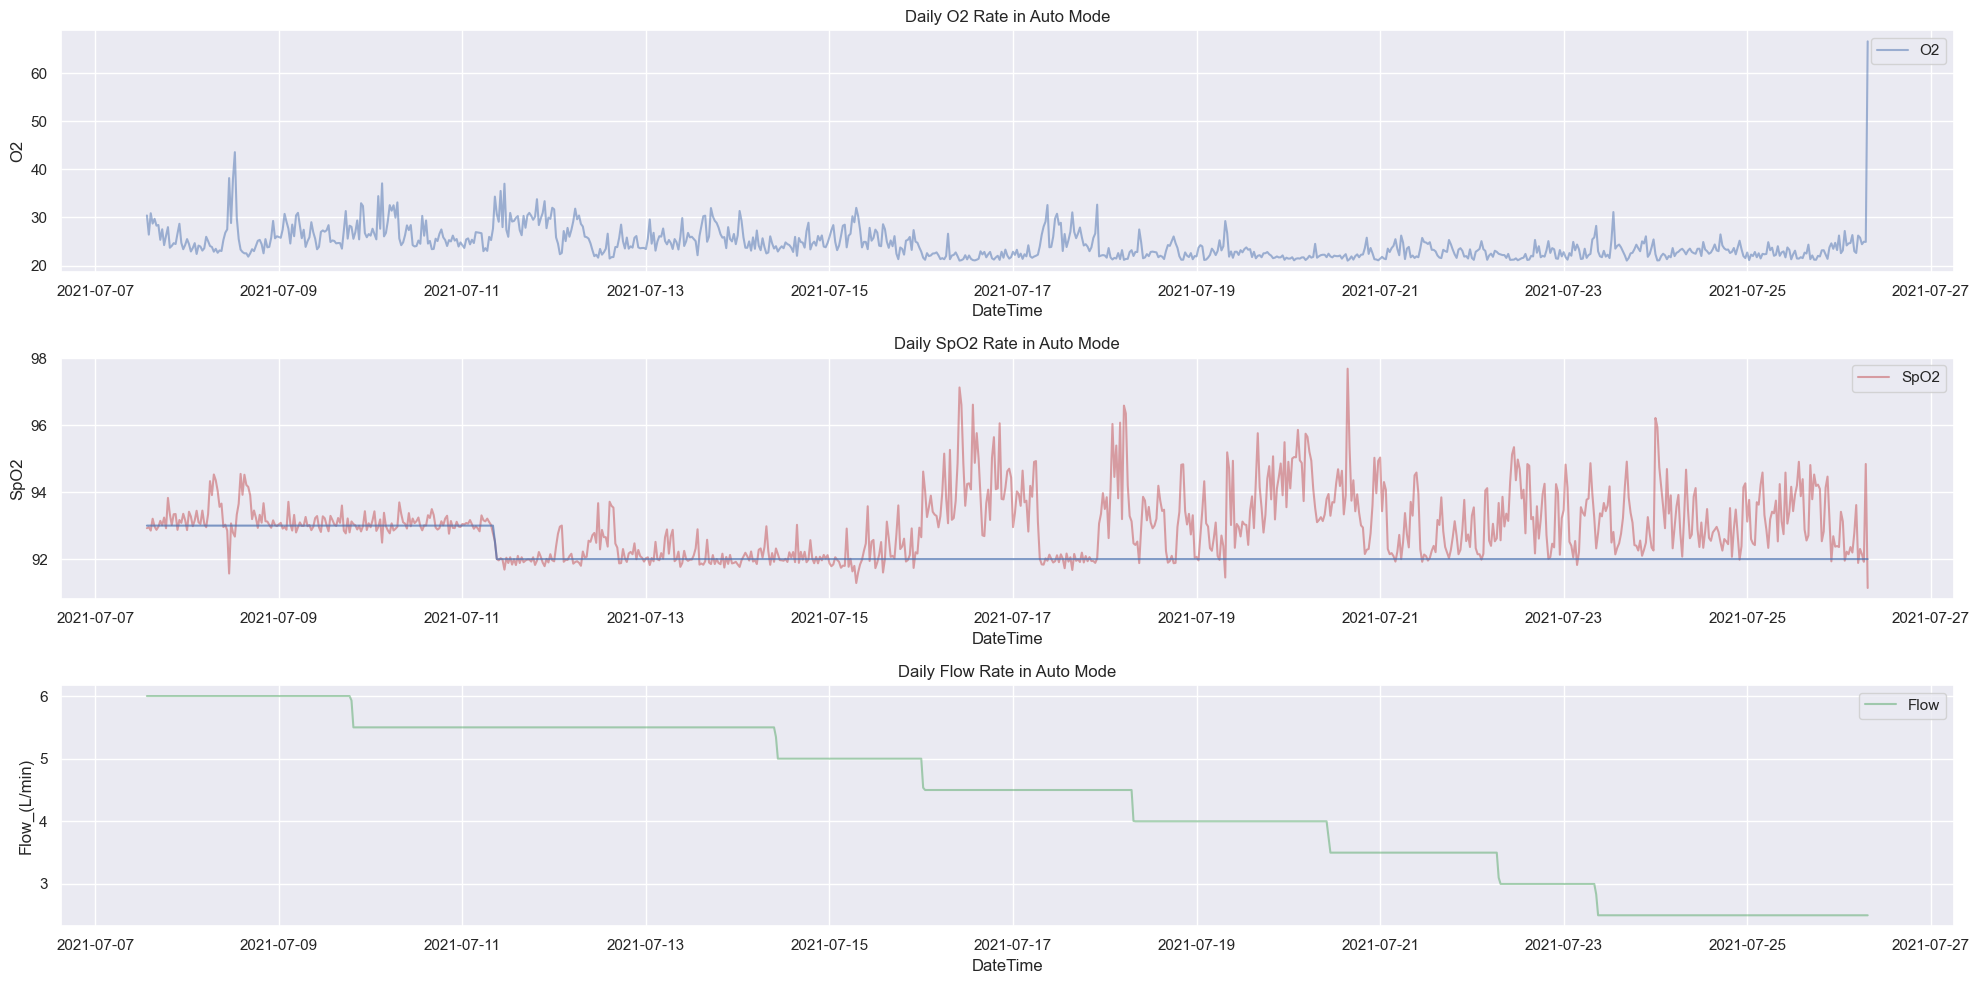

In [16]:
fig, ax = plt.subplots(3, 1, figsize=(20, 10))

sns.lineplot(x=df_resampled.index, y=df_resampled['O2'], color='b', alpha=0.5, ax=ax[0])
ax[0].set_title('Daily O2 Rate in Auto Mode')
#ax[0].set_yticks(np.arange(21, 100, 10))
ax[0].legend(['O2'])

sns.lineplot(x=df_resampled.index, y=df_resampled['SpO2'], color='r', alpha=0.5, ax=ax[1])
sns.lineplot(x=df_resampled.index, y=df_resampled['SpO2_Target'], color='b', alpha=0.7, ax=ax[1])
ax[1].set_title('Daily SpO2 Rate in Auto Mode')
ax[1].legend(['SpO2'])

sns.lineplot(x=df_resampled.index, y=df_resampled['Flow_(L/min)'], color='g', alpha=0.5, ax=ax[2])
ax[2].set_title('Daily Flow Rate in Auto Mode')
ax[2].legend(['Flow'])

plt.tight_layout()
plt.show()


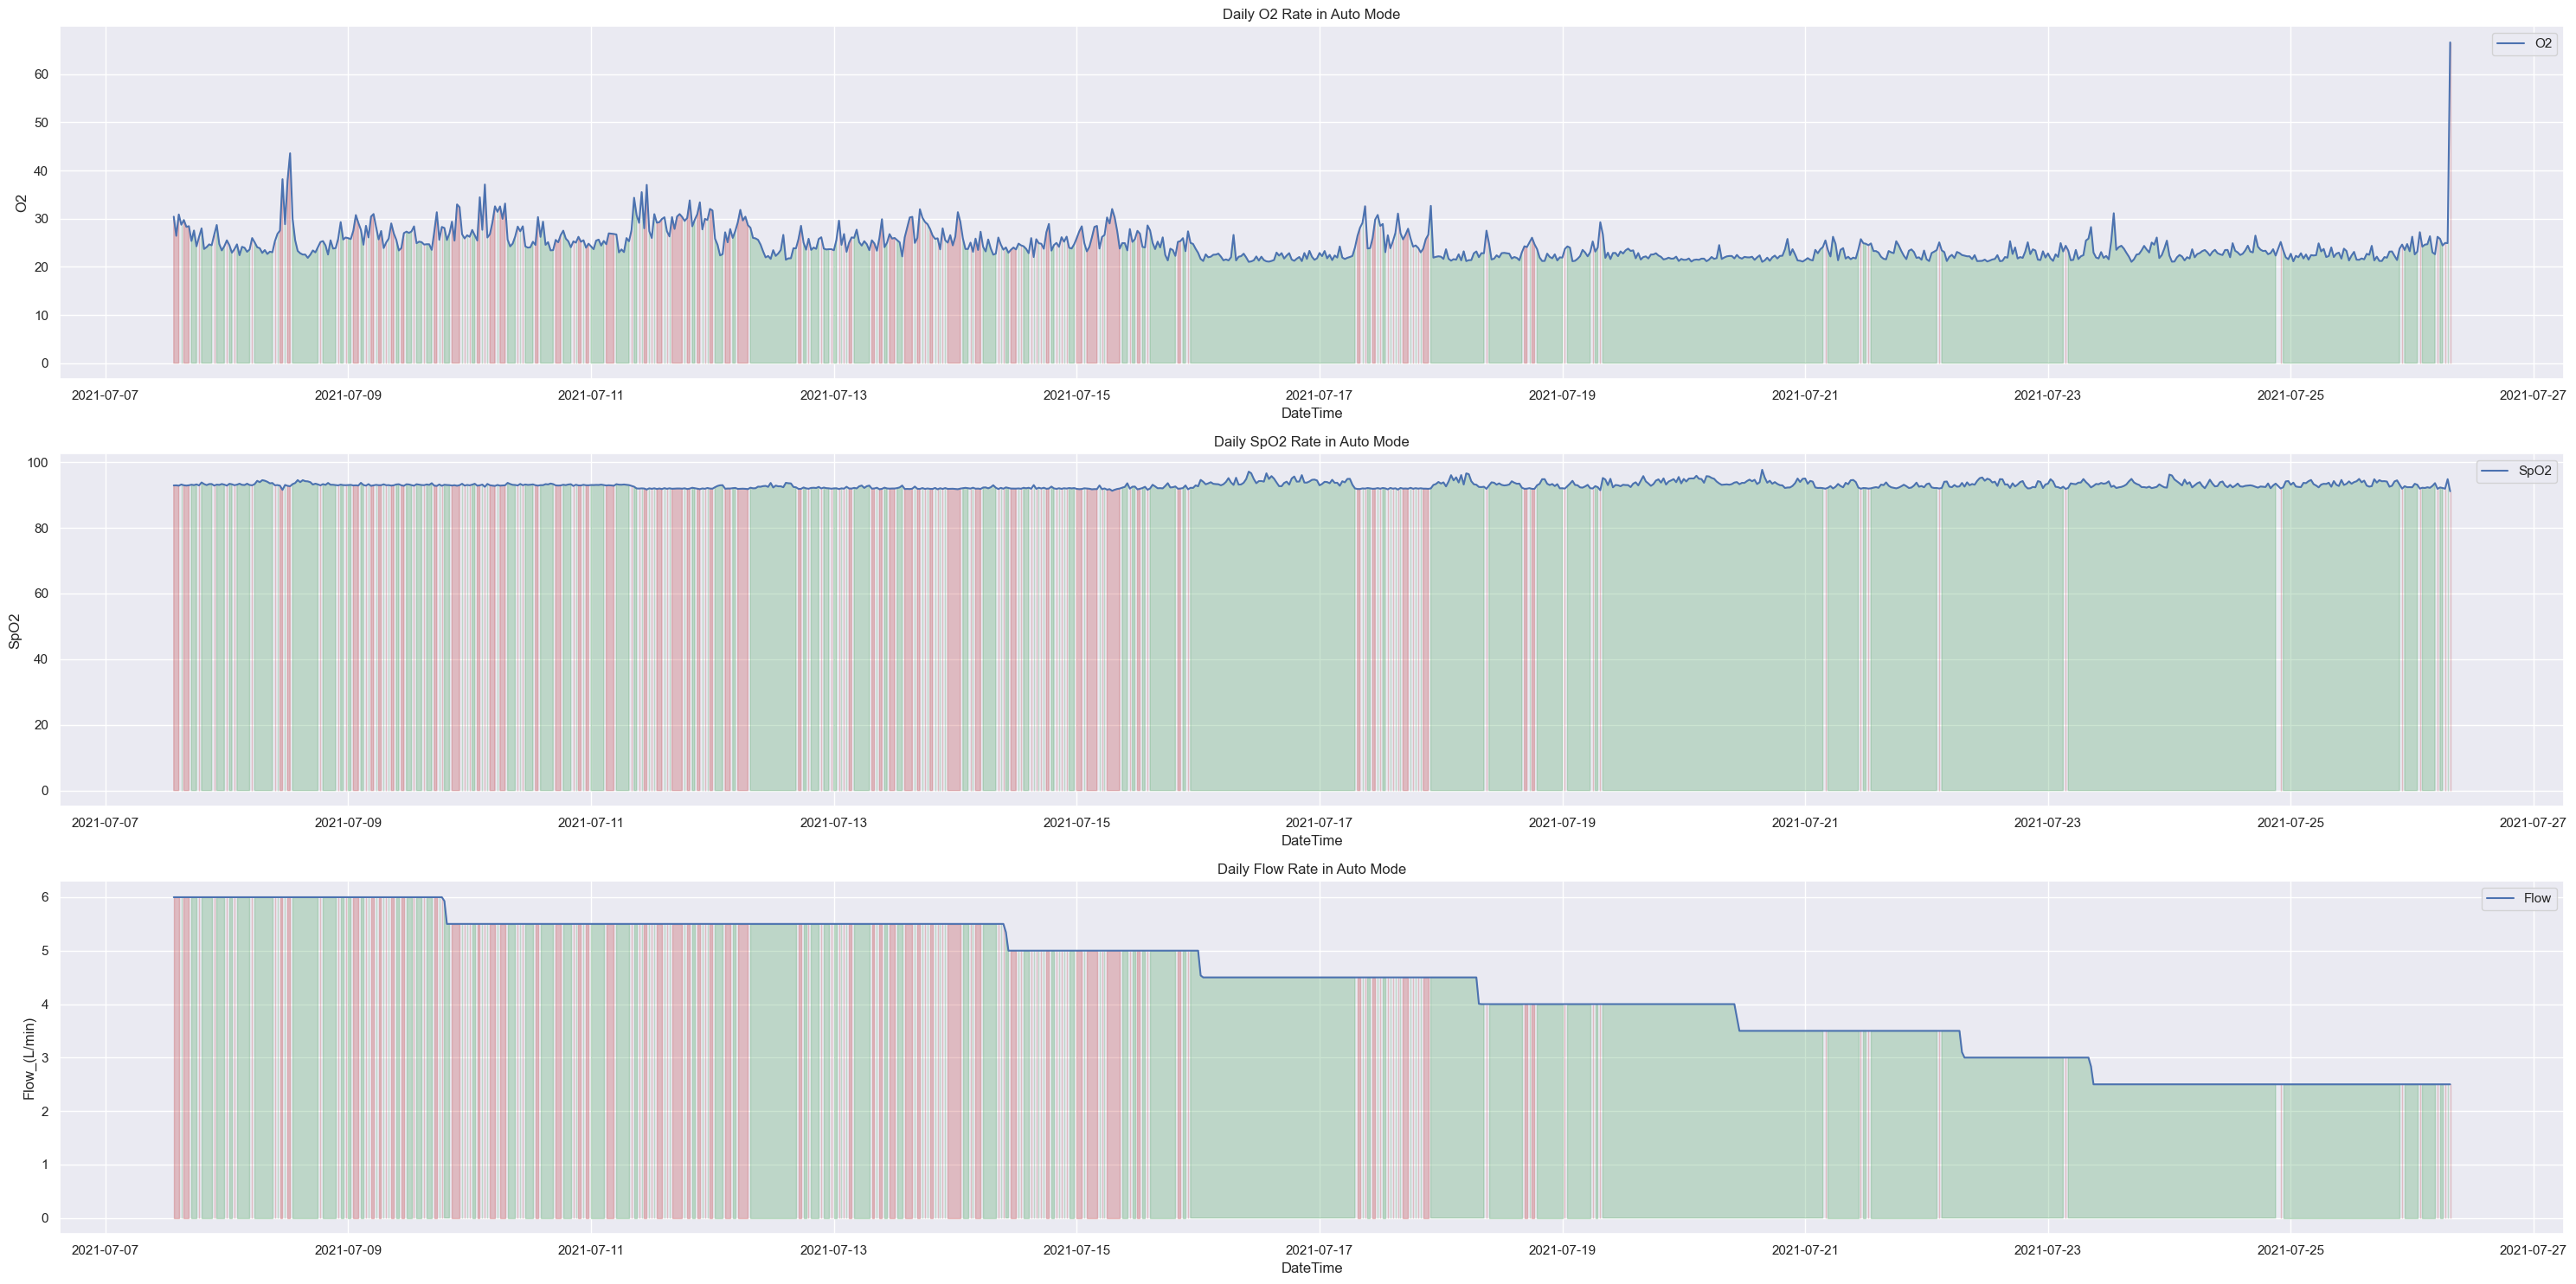

In [17]:
fig, ax = plt.subplots(3,1, figsize=(30, 15))

sns.lineplot(x=df_resampled.index, y=df_resampled['O2'], color='b', label='FIO2', ax=ax[0])
ax[0].fill_between(df_resampled.index, df_resampled['O2'], where=mask, color='g', alpha=0.3)
ax[0].fill_between(df_resampled.index, df_resampled['O2'], where=~mask, color='r', alpha=0.3)
ax[0].set_title('Daily O2 Rate in Auto Mode')
ax[0].legend(['O2'])

sns.lineplot(x=df_resampled.index, y=df_resampled['SpO2'], color='b', label='SpO2', ax=ax[1])
ax[1].fill_between(df_resampled.index, df_resampled['SpO2'], where=mask, color='g', alpha=0.3)
ax[1].fill_between(df_resampled.index, df_resampled['SpO2'], where=~mask, color='r', alpha=0.3)
ax[1].set_title('Daily SpO2 Rate in Auto Mode')
ax[1].legend(['SpO2'])

sns.lineplot(x=df_resampled.index, y=df_resampled['Flow_(L/min)'], color='b', label='Flow', ax=ax[2])
ax[2].fill_between(df_resampled.index, df_resampled['Flow_(L/min)'], where=mask, color='g', alpha=0.3)
ax[2].fill_between(df_resampled.index, df_resampled['Flow_(L/min)'], where=~mask, color='r', alpha=0.3)
ax[2].set_title('Daily Flow Rate in Auto Mode')
ax[2].legend(['Flow'])

plt.tight_layout()
plt.show()


In [18]:
traget = (df_auto['SpO2_Target']).mean()
in_trget = (df_auto['SpO2'] == traget).mean() * 100
bellow_target = (df_auto['SpO2'] < traget).mean() * 100
above_target = (df_auto['SpO2'] > traget).mean() * 100   

print(f'Target SpO2: {traget:.2f}%',
        f'In Target: {in_trget:.2f}%',
        f'Below Target: {bellow_target:.2f}%',
        f'Above Target: {above_target:.2f}%', sep='\n')

Target SpO2: 92.20%
In Target: 0.00%
Below Target: 30.59%
Above Target: 69.41%


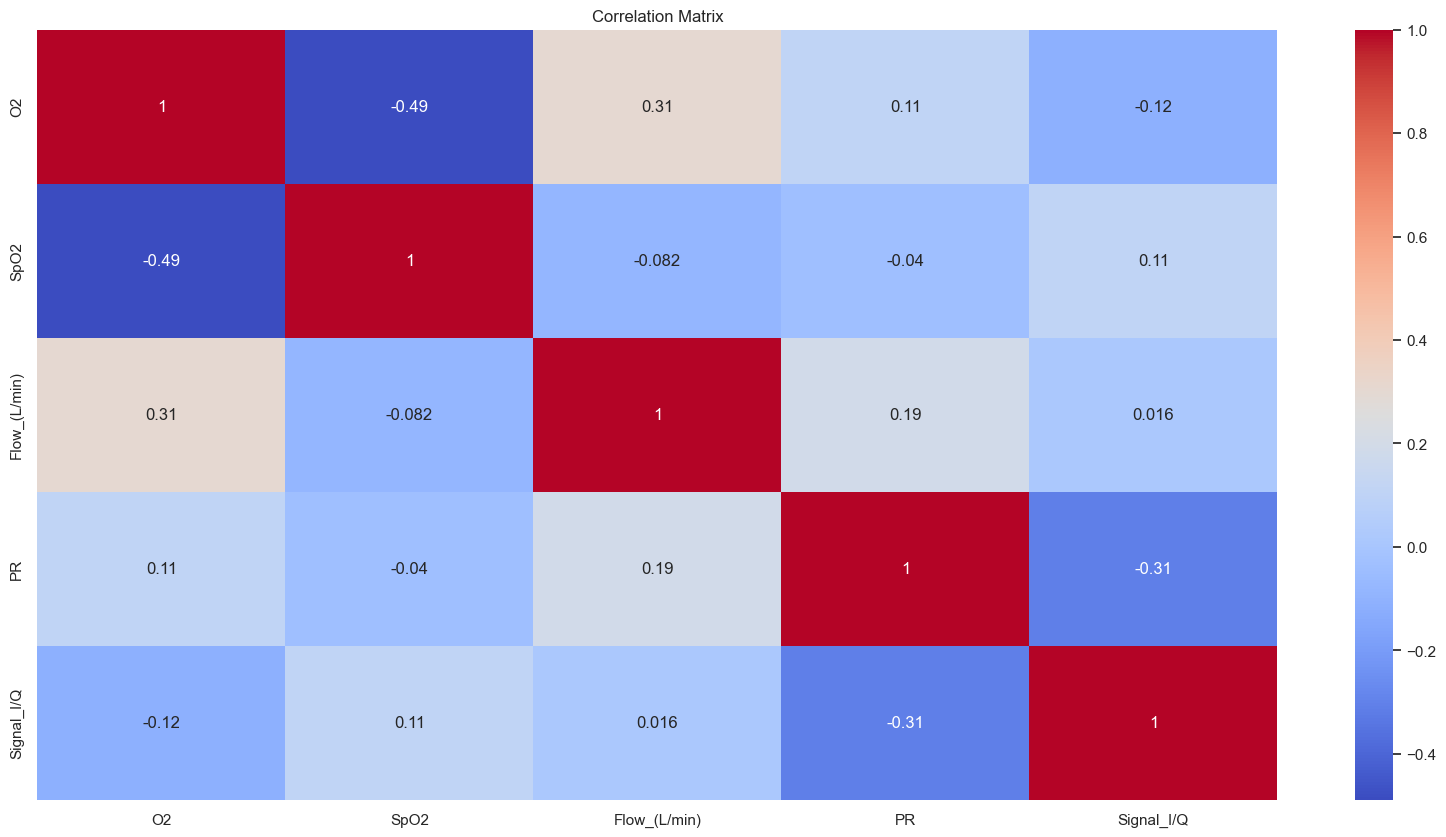

In [19]:
correletion = df_auto[['O2', 'SpO2', 'Flow_(L/min)', 'PR', 'Signal_I/Q']].corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correletion, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

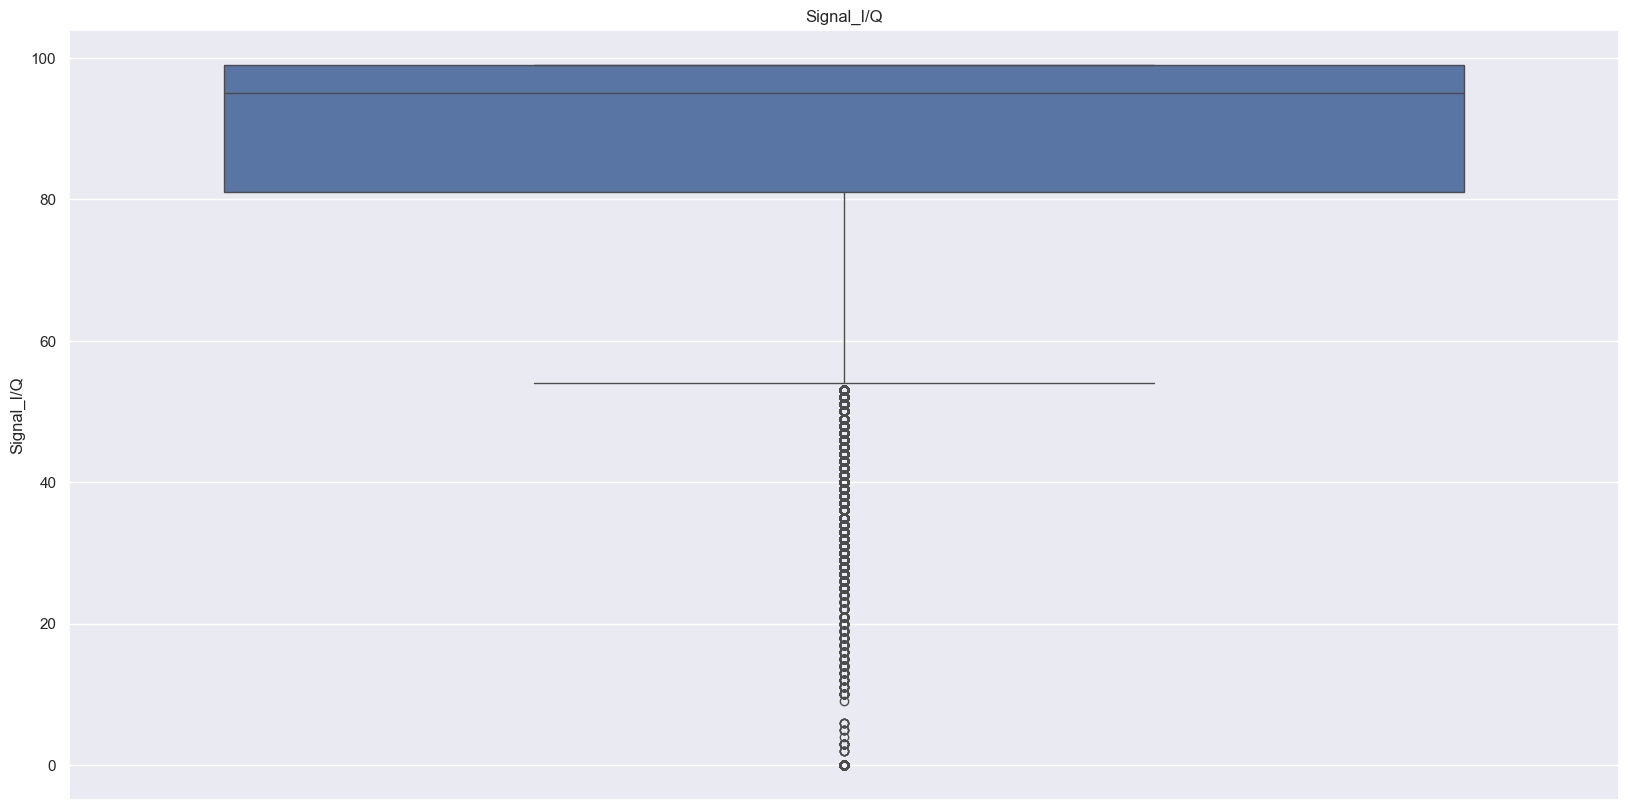

In [20]:
plt.figure(figsize=(20, 10))
sns.boxplot(y='Signal_I/Q', data=df_auto, color='b')
plt.title('Signal_I/Q')
plt.show()


In [21]:
siganl_bellow_25 = (df_auto['Signal_I/Q'] < df_auto['Signal_I/Q'].quantile(0.25)).mean().round(2) * 100
signal_quantile_25 = df_auto['Signal_I/Q'].quantile(0.25)  
signal_median = df_auto['Signal_I/Q'].median()
print(f'Signal Quality bellow 25%: {siganl_bellow_25}%', 
      f'Signal Quality 25%: {signal_quantile_25}', 
      f'Signal Quality median: {signal_median}', sep='\n')

Signal Quality bellow 25%: 25.0%
Signal Quality 25%: 81.0
Signal Quality median: 95.0


In [22]:
siganl_mask = df_resampled['Signal_I/Q'] < df_resampled['Signal_I/Q'].quantile(0.25)

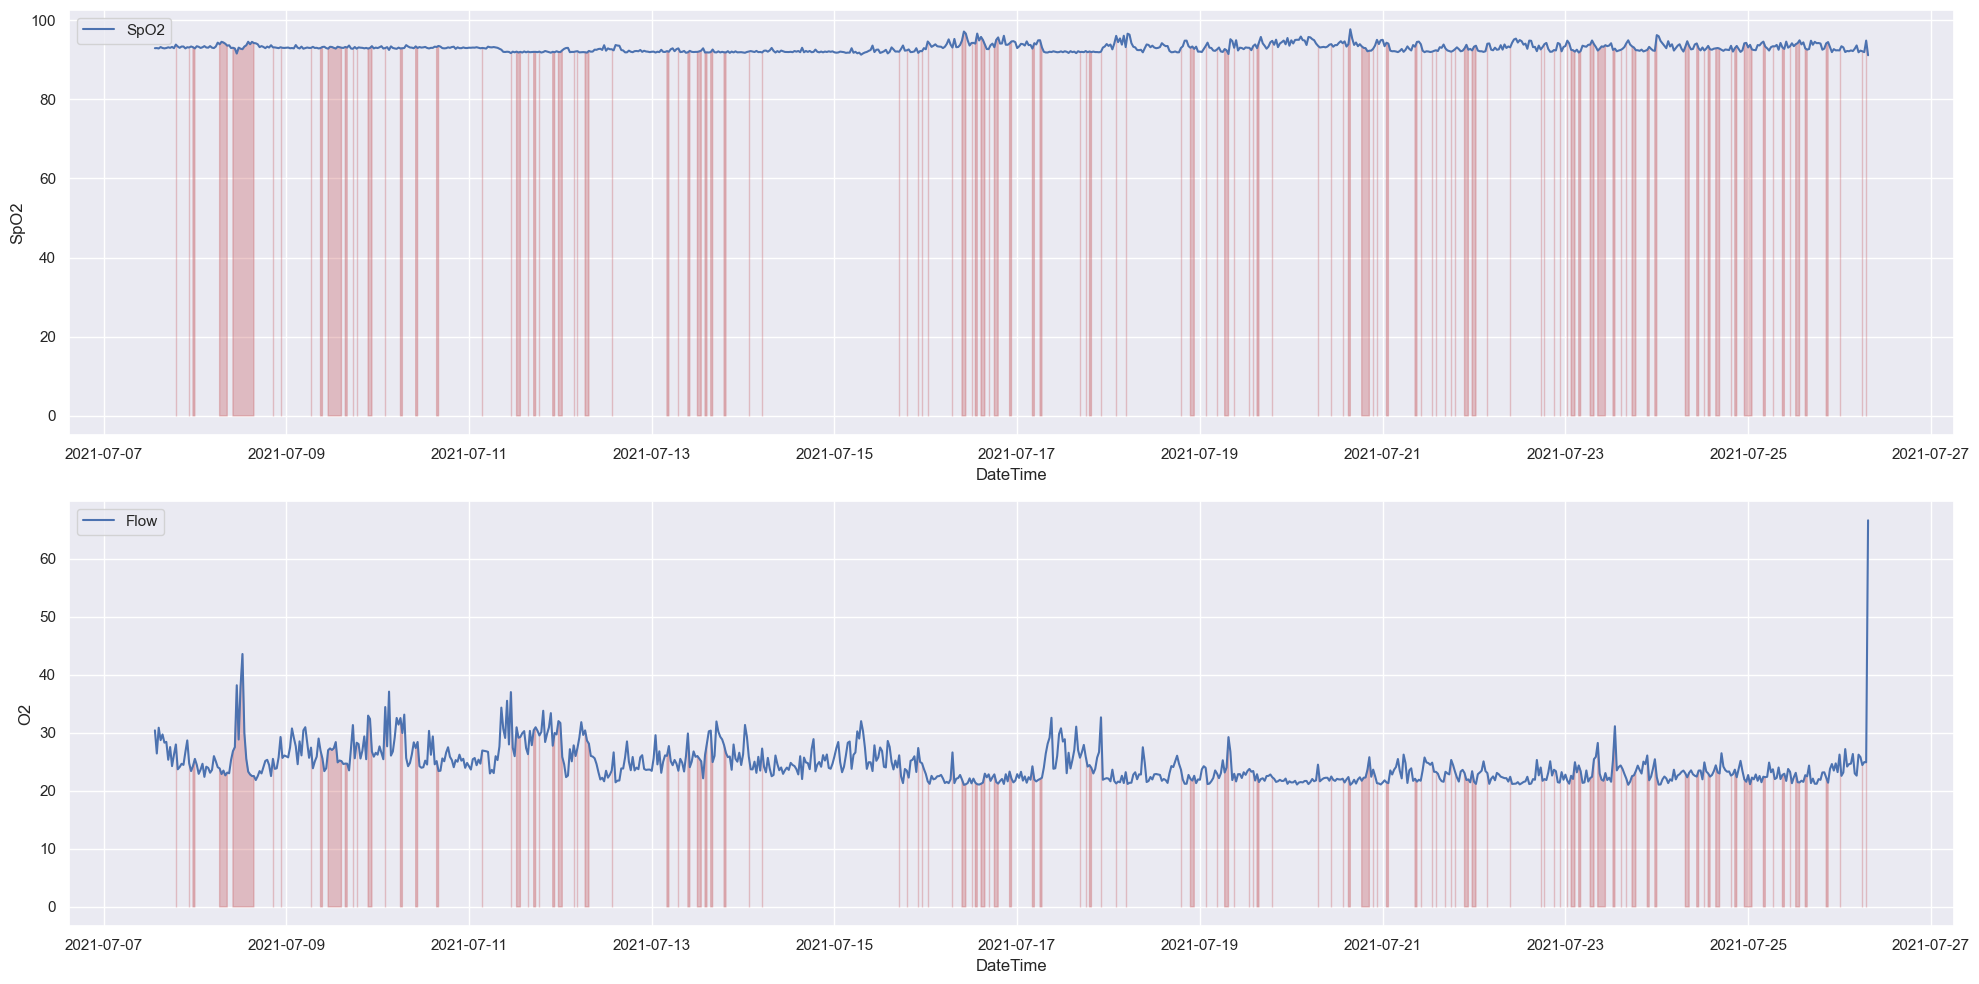

In [23]:
fig, ax = plt.subplots(2,1, figsize=(20, 10))
sns.lineplot(x=df_resampled.index, y=df_resampled['SpO2'], color='b', label='SpO2', ax=ax[0])
ax[0].fill_between(df_resampled.index, df_resampled['SpO2'], where=siganl_mask, color='r', alpha=0.3)

sns.lineplot(x=df_resampled.index, y=df_resampled['O2'], color='b', label='Flow', ax=ax[1])
ax[1].fill_between(df_resampled.index, df_resampled['O2'], where=siganl_mask, color='r', alpha=0.3)

plt.tight_layout()
plt.show()


vypočitat IQR a zobraziť boxploty pre O2, SpO2, Flow, PR, Signal_I/Q

categorise IQ and 

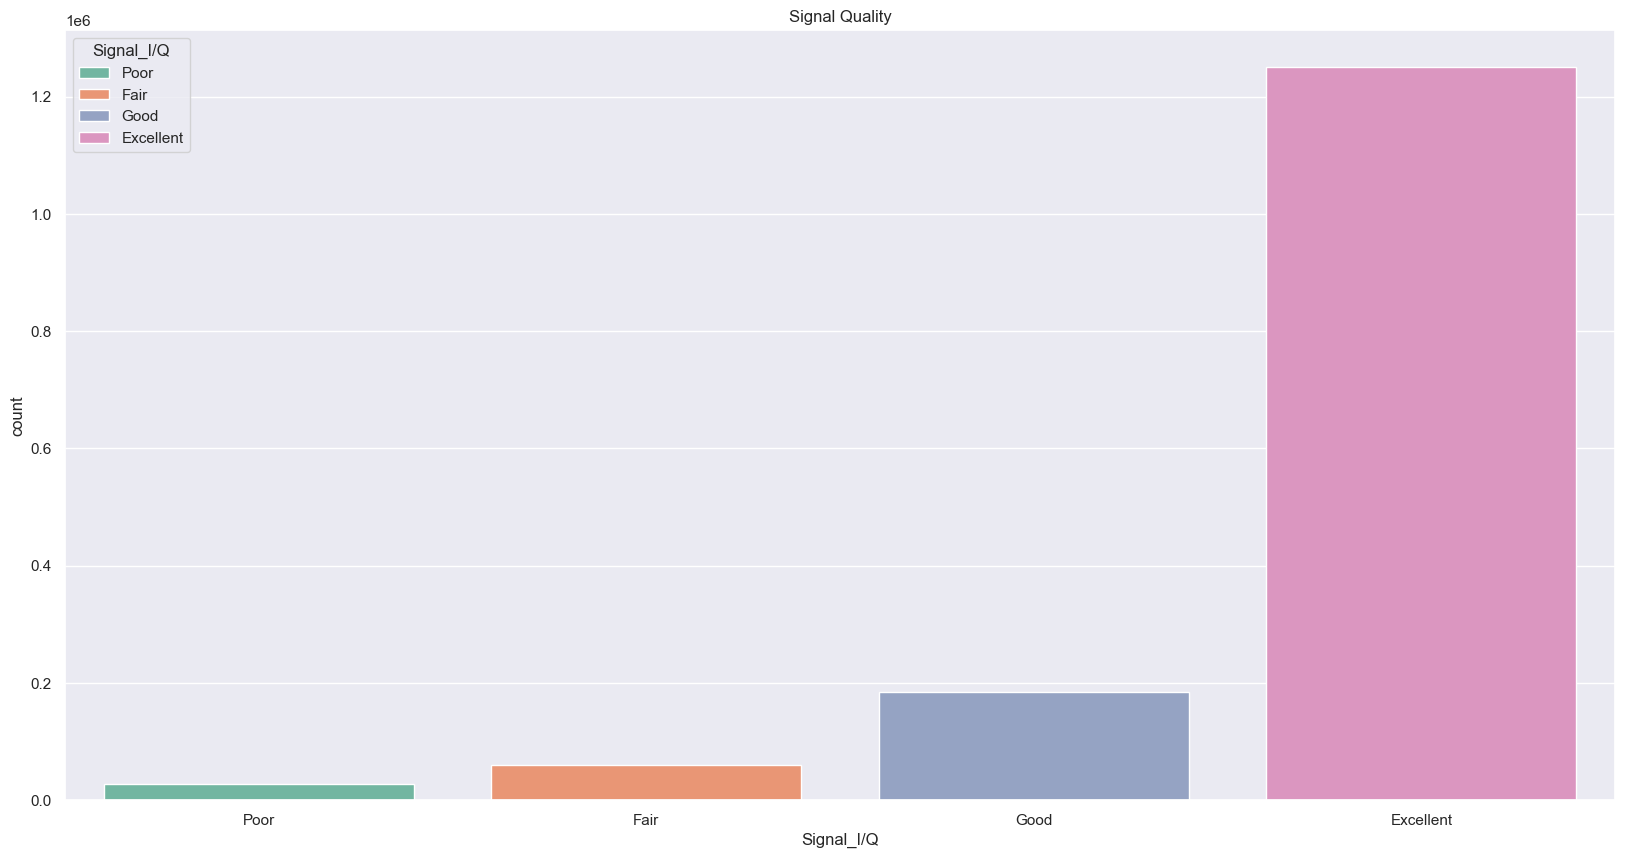

In [24]:
signal_qulity_cat = pd.cut(df_auto['Signal_I/Q'], bins=4, labels=['Poor', 'Fair', 'Good', 'Excellent'])
plt.figure(figsize=(20, 10))
sns.countplot(x=signal_qulity_cat, palette='Set2', hue=signal_qulity_cat, legend=True)
plt.title('Signal Quality')
plt.show()

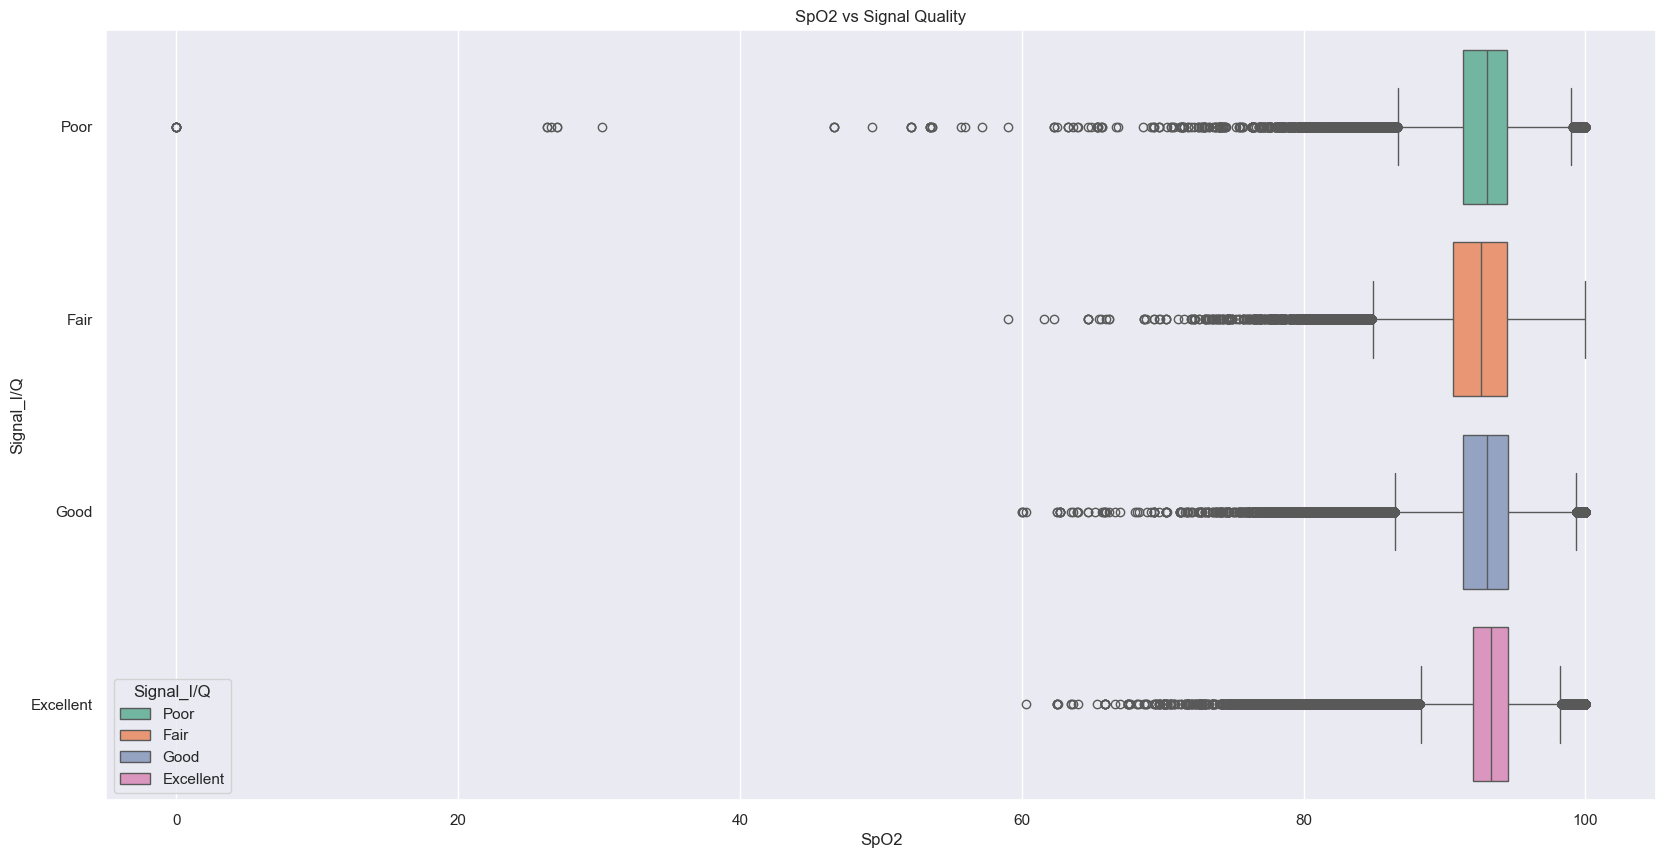

In [25]:
plt.figure(figsize=(20, 10))
sns.boxplot(x=df_auto['SpO2'], y=signal_qulity_cat, palette='Set2', hue=signal_qulity_cat, legend=True) 
plt.title('SpO2 vs Signal Quality')
plt.show()

In [26]:
def remove_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return df[(df[column] > lower_bound) & (df[column] < upper_bound)]

In [27]:
no_outliers_spo2 = remove_outliers(df_auto, 'SpO2')
no_outliers_o2 = remove_outliers(df_auto, 'O2')


In [28]:
flow_values = list(data['Flow_(L/min)'].unique())
flow_spo2 = no_outliers_spo2.groupby('Flow_(L/min)')['SpO2'].mean()
flow_o2 = no_outliers_o2.groupby('Flow_(L/min)')['O2'].mean()
flow_spo2_manual = df_manual.groupby('Flow_(L/min)')['SpO2'].std()
flow_o2_manual = df_manual.groupby('Flow_(L/min)')['O2'].mean()
print(flow_spo2_manual, flow_o2_manual)

Flow_(L/min)
6.0    33.160889
Name: SpO2, dtype: float64 Flow_(L/min)
6.0    29.0
Name: O2, dtype: float64


Mean Squared Error: 20.48242413689019
R2 Score: 0.08409349318217285


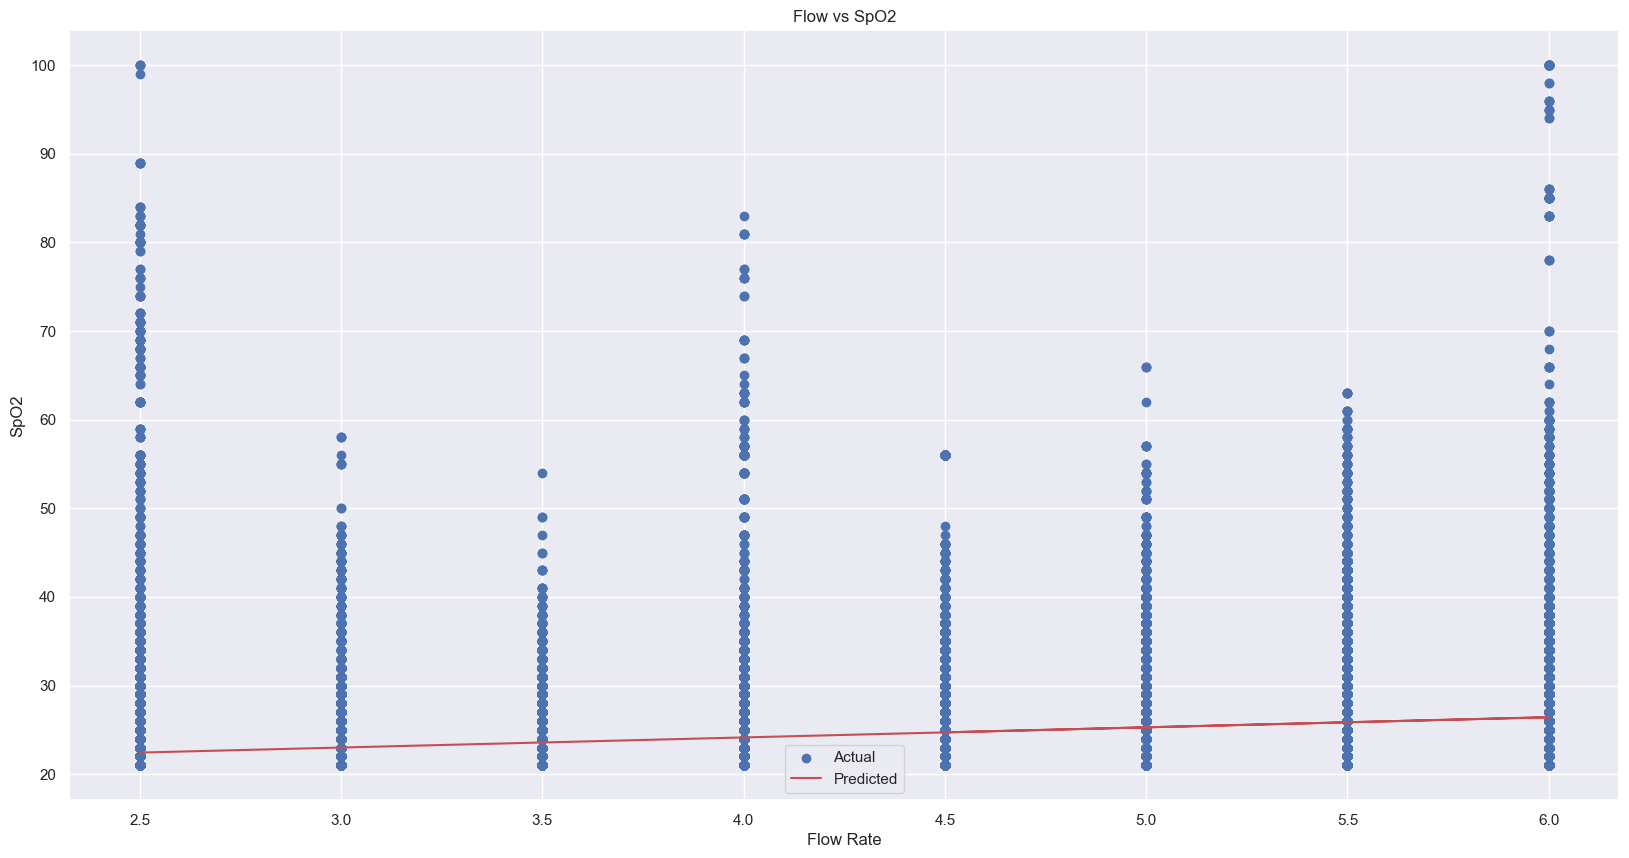

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = data['Flow_(L/min)'].values.reshape(-1, 1)
y = data['O2'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}', f'R2 Score: {r2}', sep='\n')

plt.figure(figsize=(20, 10))
plt.scatter(X_test, y_test, color='b', label='Actual')
plt.plot(X_test, y_pred, color='r', label='Predicted')
plt.title('Flow vs SpO2')
plt.xlabel('Flow Rate')
plt.ylabel('SpO2')
plt.legend()
plt.show()


In [ ]:
import statsmodels.api as sm

